In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Load your data
weather = pd.read_csv("Daniel field data.csv", parse_dates=['DATE'], index_col='DATE')

In [3]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,TAVG,TMAX,TMIN
DATE,,,,,,,,,,
1996-07-01,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,98.0,76.0
1996-07-02,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,100.0,79.0
1996-07-03,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,98.0,77.0
1996-07-04,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,91.0,67.0
1996-07-05,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,77.0,68.0
...,...,...,...,...,...,...,...,...,...,...
2024-06-19,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.0,NaN,NaN,91.0,71.0
2024-06-20,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.0,NaN,NaN,92.0,71.0
2024-06-21,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.0,NaN,NaN,95.0,69.0


In [5]:
weather.index = pd.to_datetime(weather.index, format='%d-%m-%Y')

In [7]:
weather.index

DatetimeIndex(['1996-07-01', '1996-07-02', '1996-07-03', '1996-07-04',
               '1996-07-05', '1996-07-06', '1996-07-07', '1996-07-09',
               '1996-07-10', '1996-07-12',
               ...
               '2024-06-14', '2024-06-15', '2024-06-16', '2024-06-17',
               '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21',
               '2024-06-22', '2024-06-23'],
              dtype='datetime64[ns]', name='DATE', length=10189, freq=None)

In [9]:
weather['seasonal_year'] = weather.index.year + (weather.index.month == 12)

In [15]:
# Filter for winter months: December, January, and February
winter_data = weather[(weather.index.month == 12) &(weather.index.year>=1996) | (weather.index.month <= 2) & (weather.index.year>1996)]

In [17]:
winter_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,TAVG,TMAX,TMIN,seasonal_year
DATE,,,,,,,,,,,
1996-12-01,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,66.0,53.0,1997
1996-12-02,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,60.0,44.0,1997
1996-12-03,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,62.0,38.0,1997
1996-12-04,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,58.0,39.0,1997
1996-12-05,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,56.0,45.0,1997
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-25,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.00,NaN,NaN,60.0,35.0,2024
2024-02-26,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.00,NaN,NaN,74.0,40.0,2024
2024-02-27,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.00,NaN,NaN,71.0,51.0,2024


In [19]:
winter_data.columns = winter_data.columns.str.lower()

In [21]:
winter_data

,station,name,latitude,longitude,elevation,prcp,snow,tavg,tmax,tmin,seasonal_year
DATE,,,,,,,,,,,
1996-12-01,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,66.0,53.0,1997
1996-12-02,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,60.0,44.0,1997
1996-12-03,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,62.0,38.0,1997
1996-12-04,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,58.0,39.0,1997
1996-12-05,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,56.0,45.0,1997
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-25,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.00,NaN,NaN,60.0,35.0,2024
2024-02-26,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.00,NaN,NaN,74.0,40.0,2024
2024-02-27,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.00,NaN,NaN,71.0,51.0,2024


In [25]:
seasonal_avg_temp = winter_data.groupby('seasonal_year')['tmax'].mean()

In [27]:
seasonal_avg_temp

seasonal_year
1997    59.897727
1998    57.555556
1999    61.887640
2000    59.208791
2001    55.686047
2002    60.811111
2003    55.544444
2004    55.275862
2005    58.655556
2006    58.922222
2007    59.888889
2008    60.780220
2009    60.111111
2010    52.204545
2011    54.662921
2012    62.477778
2013    60.877778
2014    58.422222
2015    57.744444
2016    62.252747
2017    65.200000
2018    61.733333
2019    61.766667
2020    62.384615
2021    59.134831
2022    63.922222
2023    62.377778
2024    60.877778
Name: tmax, dtype: float64

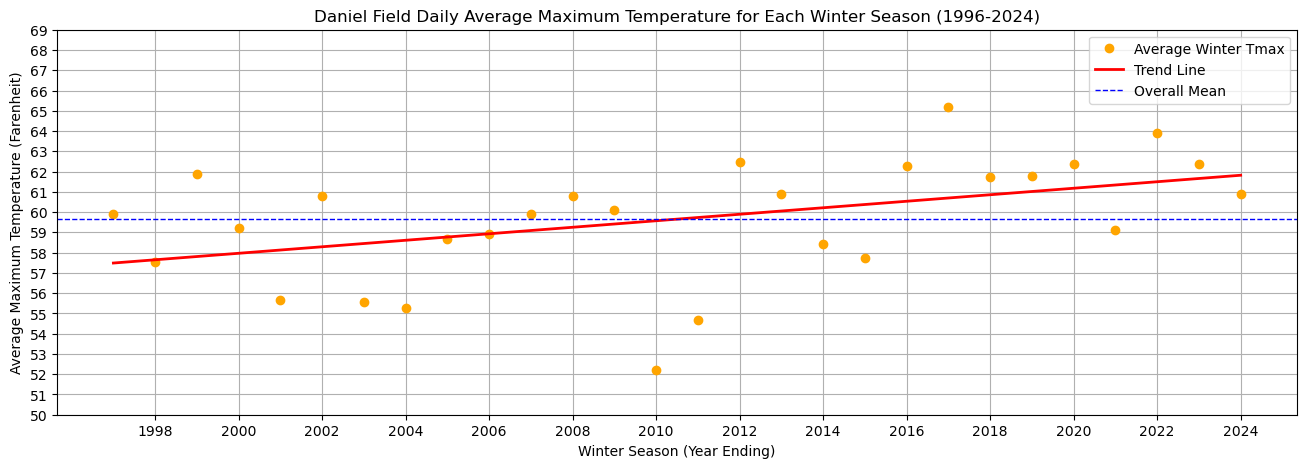

In [136]:
seasonal_avg_temp = winter_data.groupby('seasonal_year')['tmax'].mean()

# Setup for plotting
years = seasonal_avg_temp.index
temp_values = seasonal_avg_temp.values

# Calculate the linear trend line
slope, intercept = np.polyfit(years, temp_values, 1)
trend_line = slope * years + intercept

# Calculate overall mean
overall_mean = seasonal_avg_temp.mean()

# Plotting
plt.figure(figsize=(16, 5))
plt.plot(years, temp_values,'o', color='orange', label='Average Winter Tmax')

# Plotting trend line and overall mean
plt.plot(years, trend_line, 'r-',linewidth=2, label='Trend Line')
plt.axhline(y=overall_mean, color='blue', linestyle='--', linewidth=1, label='Overall Mean')

tick_interval = 2  # Adjust this value as needed for optimal spacing
plt.xticks([year for year in years if year % tick_interval == 0])
plt.yticks(np.arange(50, 70))

plt.title('Daniel Field Daily Average Maximum Temperature for Each Winter Season (1996-2024)')
plt.xlabel('Winter Season (Year Ending)')
plt.ylabel('Average Maximum Temperature (Farenheit)')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
Spring_data = weather[(weather.index.month == 3) | (weather.index.month == 4)| (weather.index.month == 5)].copy()

In [70]:
Spring_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,TAVG,TMAX,TMIN,seasonal_year
DATE,,,,,,,,,,,
1997-03-01,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,85.0,62.0,1997
1997-03-02,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,83.0,64.0,1997
1997-03-03,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,85.0,64.0,1997
1997-03-04,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,80.0,54.0,1997
1997-03-05,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,83.0,54.0,1997
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.03,NaN,NaN,87.0,73.0,2024
2024-05-28,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.00,NaN,NaN,90.0,70.0,2024
2024-05-29,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.00,NaN,NaN,87.0,66.0,2024


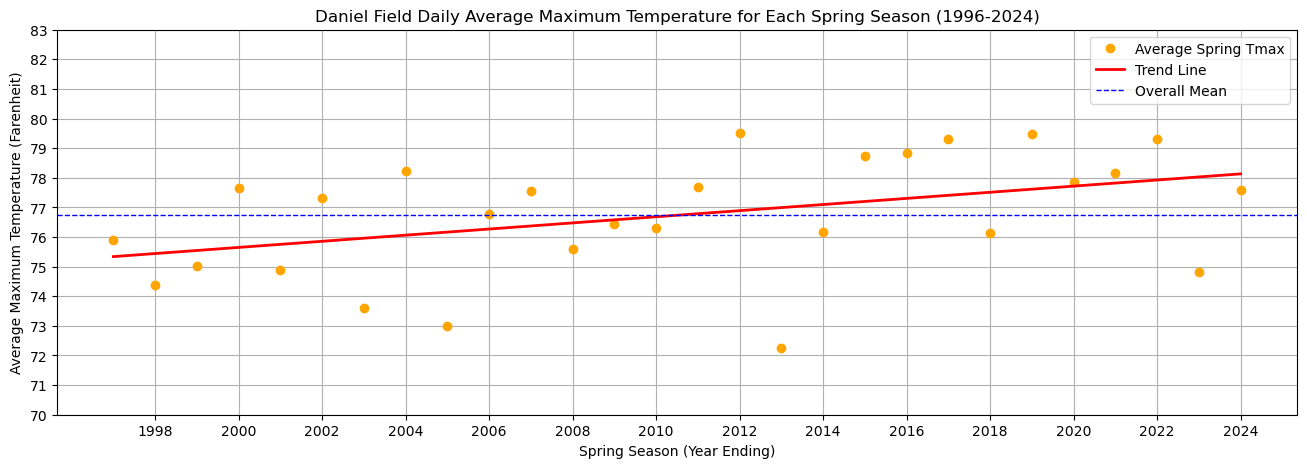

In [138]:
seasonal_avg_temp = Spring_data.groupby('seasonal_year')['TMAX'].mean()

# Setup for plotting
years = seasonal_avg_temp.index
temp_values = seasonal_avg_temp.values

# Calculate the linear trend line
slope, intercept = np.polyfit(years, temp_values, 1)
trend_line = slope * years + intercept

# Calculate overall mean
overall_mean = seasonal_avg_temp.mean()

# Plotting
plt.figure(figsize=(16, 5))
plt.plot(years, temp_values,'o', color='orange', label='Average Spring Tmax')

# Plotting trend line and overall mean
plt.plot(years, trend_line, 'r-',linewidth=2, label='Trend Line')
plt.axhline(y=overall_mean, color='blue', linestyle='--', linewidth=1, label='Overall Mean')

tick_interval = 2  # Adjust this value as needed for optimal spacing
plt.xticks([year for year in years if year % tick_interval == 0])
plt.yticks(np.arange(70, 84))

plt.title('Daniel Field Daily Average Maximum Temperature for Each Spring Season (1996-2024)')
plt.xlabel('Spring Season (Year Ending)')
plt.ylabel('Average Maximum Temperature (Farenheit)')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
Summer_data = weather[(weather.index.month == 6) | (weather.index.month == 7)| (weather.index.month == 8)].copy()

In [76]:
Summer_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,TAVG,TMAX,TMIN,seasonal_year
DATE,,,,,,,,,,,
1996-07-01,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,98.0,76.0,1996
1996-07-02,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,100.0,79.0,1996
1996-07-03,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,98.0,77.0,1996
1996-07-04,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,91.0,67.0,1996
1996-07-05,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,77.0,68.0,1996
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.0,NaN,NaN,91.0,71.0,2024
2024-06-20,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.0,NaN,NaN,92.0,71.0,2024
2024-06-21,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.0,NaN,NaN,95.0,69.0,2024


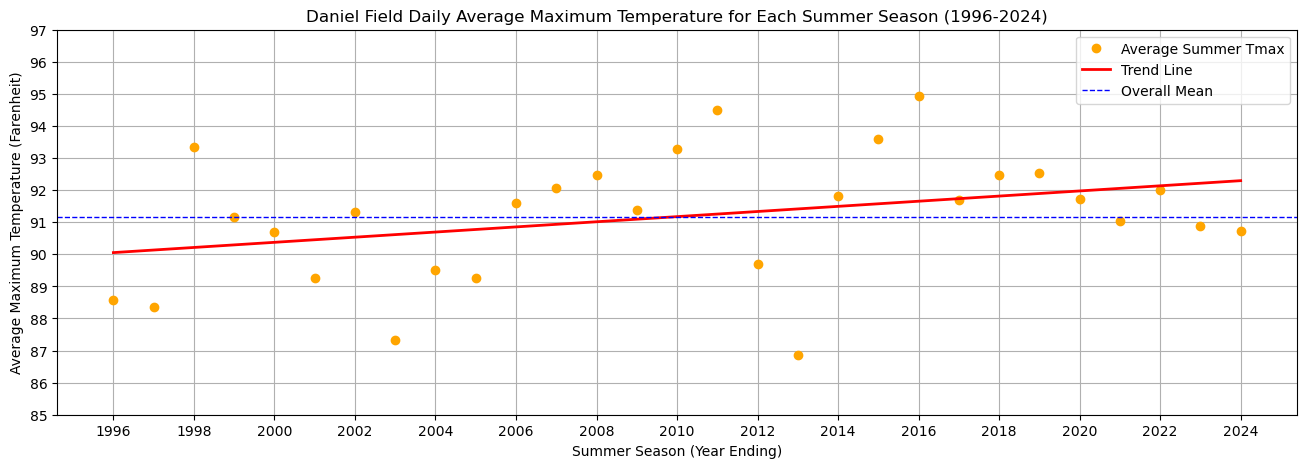

In [140]:
seasonal_avg_temp = Summer_data.groupby('seasonal_year')['TMAX'].mean()

# Setup for plotting
years = seasonal_avg_temp.index
temp_values = seasonal_avg_temp.values

# Calculate the linear trend line
slope, intercept = np.polyfit(years, temp_values, 1)
trend_line = slope * years + intercept

# Calculate overall mean
overall_mean = seasonal_avg_temp.mean()

# Plotting
plt.figure(figsize=(16, 5))
plt.plot(years, temp_values,'o', color='orange', label='Average Summer Tmax')

# Plotting trend line and overall mean
plt.plot(years, trend_line, 'r-',linewidth=2, label='Trend Line')
plt.axhline(y=overall_mean, color='blue', linestyle='--', linewidth=1, label='Overall Mean')

tick_interval = 2  # Adjust this value as needed for optimal spacing
plt.xticks([year for year in years if year % tick_interval == 0])
plt.yticks(np.arange(85, 98))

plt.title('Daniel Field Daily Average Maximum Temperature for Each Summer Season (1996-2024)')
plt.xlabel('Summer Season (Year Ending)')
plt.ylabel('Average Maximum Temperature (Farenheit)')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
Fall_data = weather[(weather.index.month == 9) | (weather.index.month == 10)| (weather.index.month == 11)].copy()

In [92]:
Fall_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,TAVG,TMAX,TMIN,seasonal_year
DATE,,,,,,,,,,,
1996-09-01,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,79.0,69.0,1996
1996-09-02,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,79.0,69.0,1996
1996-09-03,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,86.0,69.0,1996
1996-09-04,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,88.0,71.0,1996
1996-09-05,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,NaN,NaN,NaN,80.0,72.0,1996
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-26,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.19,NaN,NaN,46.0,42.0,2023
2023-11-27,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.00,NaN,NaN,57.0,42.0,2023
2023-11-28,USW00013837,"AUGUSTA DANIEL FIELD AIRPORT, GA US",33.4668,-82.03847,125.1,0.00,NaN,NaN,56.0,39.0,2023


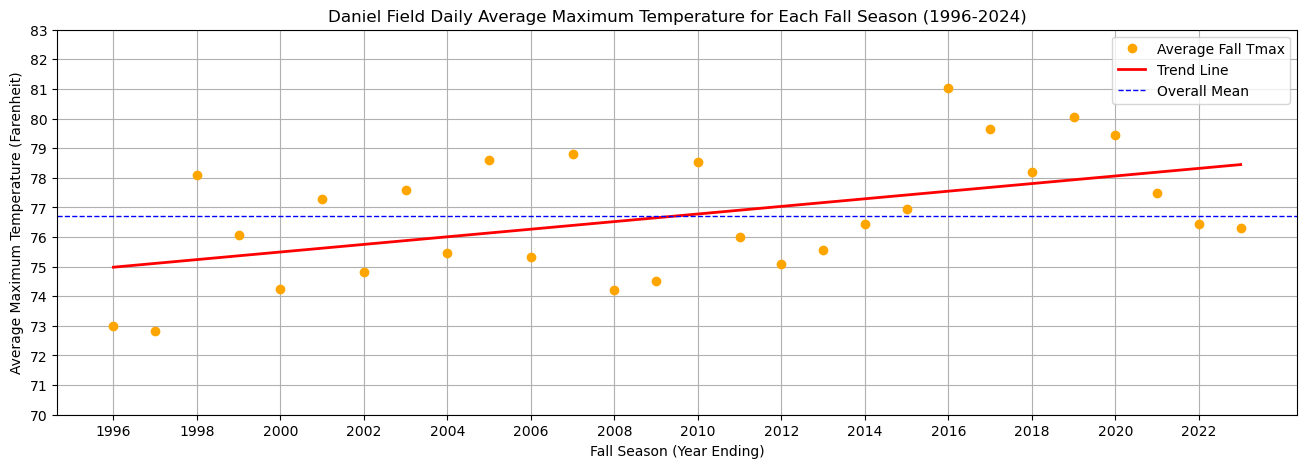

In [142]:
seasonal_avg_temp = Fall_data.groupby('seasonal_year')['TMAX'].mean()

# Setup for plotting
years = seasonal_avg_temp.index
temp_values = seasonal_avg_temp.values

# Calculate the linear trend line
slope, intercept = np.polyfit(years, temp_values, 1)
trend_line = slope * years + intercept

# Calculate overall mean
overall_mean = seasonal_avg_temp.mean()

# Plotting
plt.figure(figsize=(16, 5))
plt.plot(years, temp_values,'o', color='orange', label='Average Fall Tmax')

# Plotting trend line and overall mean
plt.plot(years, trend_line, 'r-',linewidth=2, label='Trend Line')
plt.axhline(y=overall_mean, color='blue', linestyle='--', linewidth=1, label='Overall Mean')

tick_interval = 2  # Adjust this value as needed for optimal spacing
plt.xticks([year for year in years if year % tick_interval == 0])
plt.yticks(np.arange(70, 84))

plt.title('Daniel Field Daily Average Maximum Temperature for Each Fall Season (1996-2024)')
plt.xlabel('Fall Season (Year Ending)')
plt.ylabel('Average Maximum Temperature (Farenheit)')
plt.legend()
plt.grid(True)
plt.show()

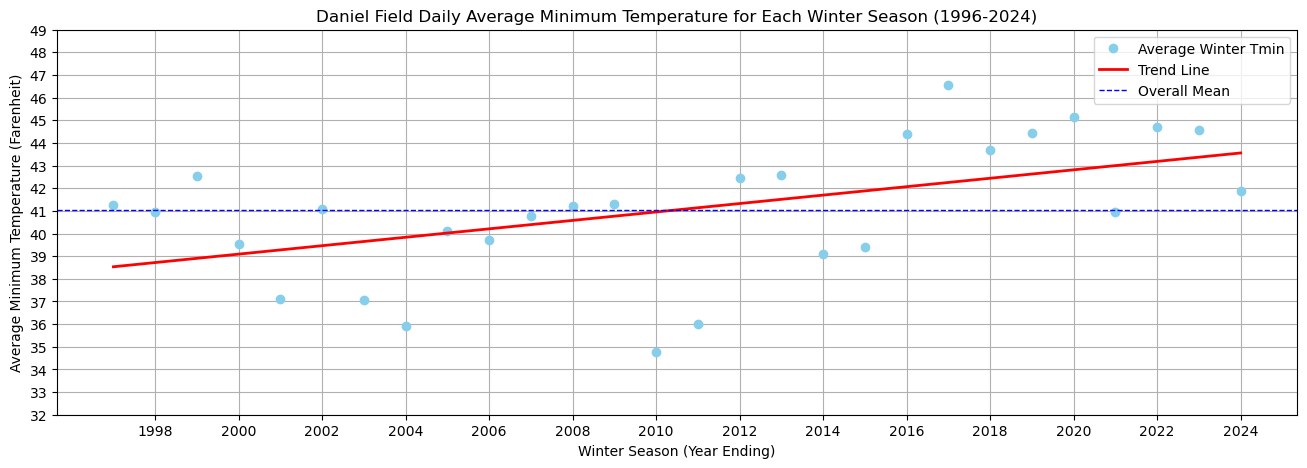

In [144]:
seasonal_avg_temp = winter_data.groupby('seasonal_year')['tmin'].mean()

# Setup for plotting
years = seasonal_avg_temp.index
temp_values = seasonal_avg_temp.values

# Calculate the linear trend line
slope, intercept = np.polyfit(years, temp_values, 1)
trend_line = slope * years + intercept

# Calculate overall mean
overall_mean = seasonal_avg_temp.mean()

# Plotting
plt.figure(figsize=(16, 5))
plt.plot(years, temp_values,'o', color='skyblue', label='Average Winter Tmin')

# Plotting trend line and overall mean
plt.plot(years, trend_line, 'r-',linewidth=2, label='Trend Line')
plt.axhline(y=overall_mean, color='blue', linestyle='--', linewidth=1, label='Overall Mean')

tick_interval = 2  # Adjust this value as needed for optimal spacing
plt.xticks([year for year in years if year % tick_interval == 0])
plt.yticks(np.arange(32, 50))

plt.title('Daniel Field Daily Average Minimum Temperature for Each Winter Season (1996-2024)')
plt.xlabel('Winter Season (Year Ending)')
plt.ylabel('Average Minimum Temperature (Farenheit)')
plt.legend()
plt.grid(True)
plt.show()

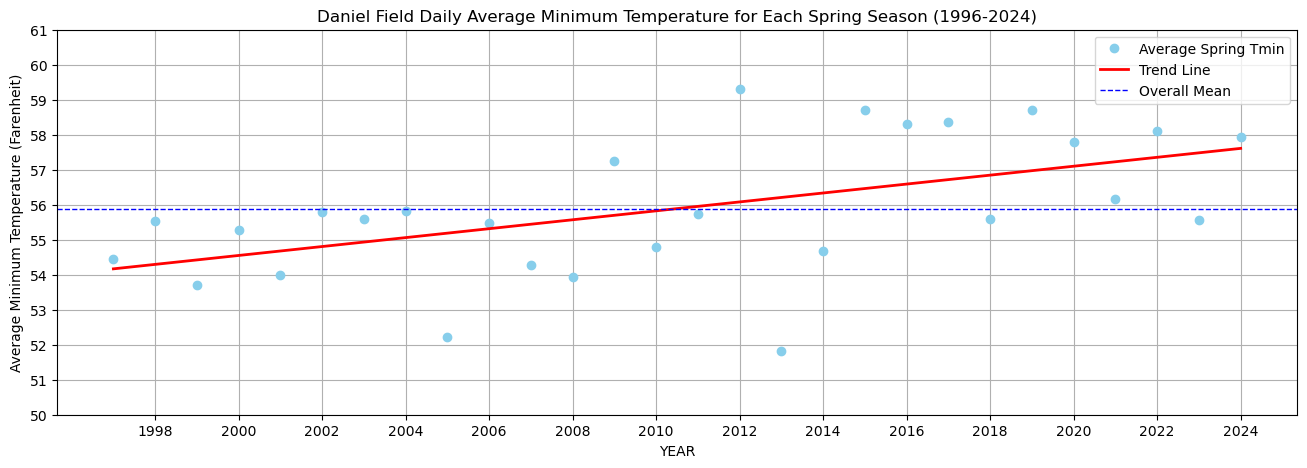

In [146]:
seasonal_avg_temp = Spring_data.groupby('seasonal_year')['TMIN'].mean()

# Setup for plotting
years = seasonal_avg_temp.index
temp_values = seasonal_avg_temp.values

# Calculate the linear trend line
slope, intercept = np.polyfit(years, temp_values, 1)
trend_line = slope * years + intercept

# Calculate overall mean
overall_mean = seasonal_avg_temp.mean()

# Plotting
plt.figure(figsize=(16, 5))
plt.plot(years, temp_values,'o', color='skyblue', label='Average Spring Tmin')

# Plotting trend line and overall mean
plt.plot(years, trend_line, 'r-',linewidth=2, label='Trend Line')
plt.axhline(y=overall_mean, color='blue', linestyle='--', linewidth=1, label='Overall Mean')

tick_interval = 2  # Adjust this value as needed for optimal spacing
plt.xticks([year for year in years if year % tick_interval == 0])
plt.yticks(np.arange(50, 62))

plt.title('Daniel Field Daily Average Minimum Temperature for Each Spring Season (1996-2024)')
plt.xlabel('YEAR')
plt.ylabel('Average Minimum Temperature (Farenheit)')
plt.legend()
plt.grid(True)
plt.show()

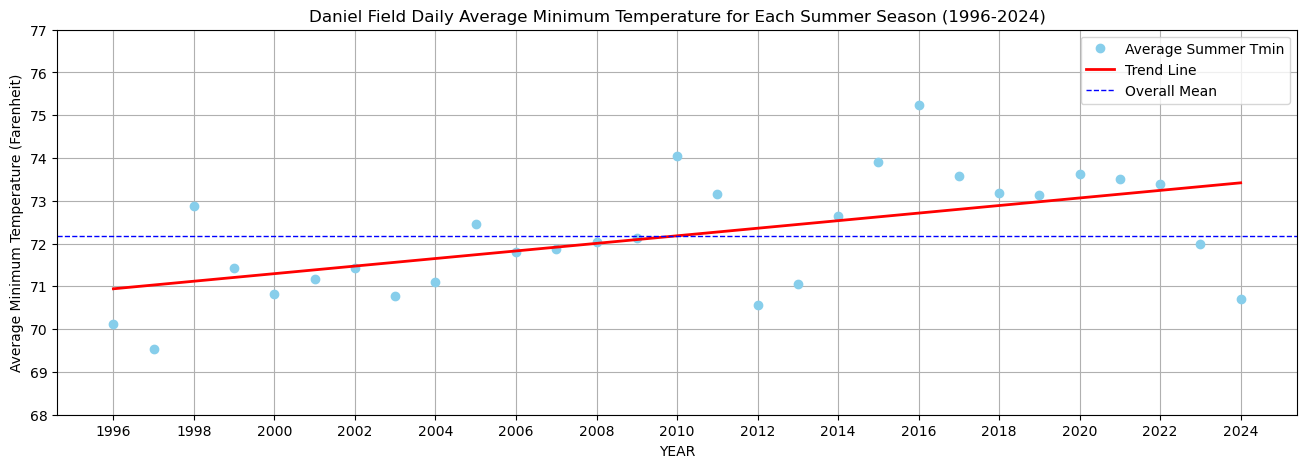

In [148]:
seasonal_avg_temp = Summer_data.groupby('seasonal_year')['TMIN'].mean()

# Setup for plotting
years = seasonal_avg_temp.index
temp_values = seasonal_avg_temp.values

# Calculate the linear trend line
slope, intercept = np.polyfit(years, temp_values, 1)
trend_line = slope * years + intercept

# Calculate overall mean
overall_mean = seasonal_avg_temp.mean()

# Plotting
plt.figure(figsize=(16, 5))
plt.plot(years, temp_values,'o', color='skyblue', label='Average Summer Tmin')

# Plotting trend line and overall mean
plt.plot(years, trend_line, 'r-',linewidth=2, label='Trend Line')
plt.axhline(y=overall_mean, color='blue', linestyle='--', linewidth=1, label='Overall Mean')

tick_interval = 2  # Adjust this value as needed for optimal spacing
plt.xticks([year for year in years if year % tick_interval == 0])
plt.yticks(np.arange(68, 78))

plt.title('Daniel Field Daily Average Minimum Temperature for Each Summer Season (1996-2024)')
plt.xlabel('YEAR')
plt.ylabel('Average Minimum Temperature (Farenheit)')
plt.legend()
plt.grid(True)
plt.show()

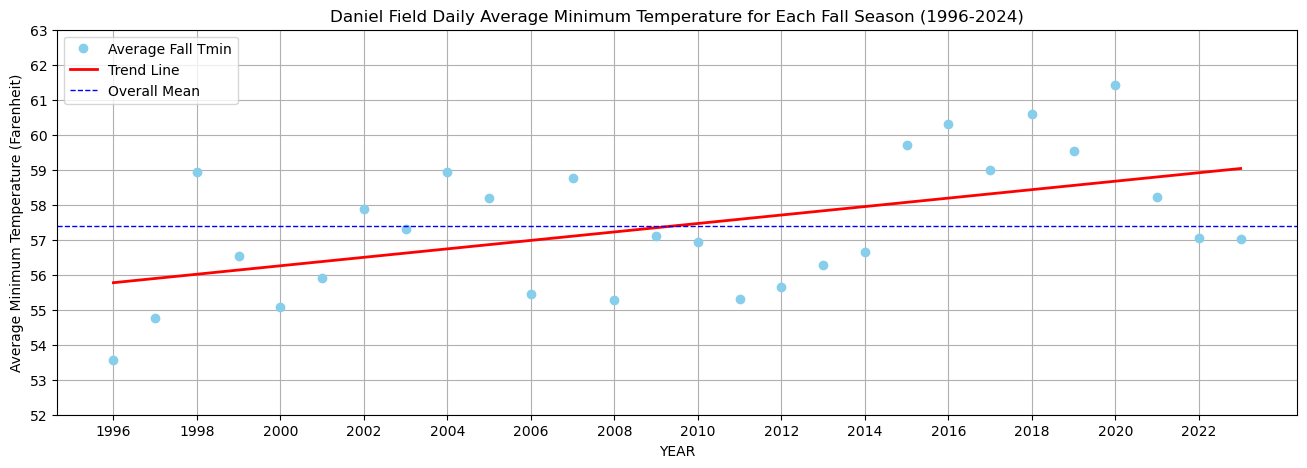

In [150]:
seasonal_avg_temp = Fall_data.groupby('seasonal_year')['TMIN'].mean()

# Setup for plotting
years = seasonal_avg_temp.index
temp_values = seasonal_avg_temp.values

# Calculate the linear trend line
slope, intercept = np.polyfit(years, temp_values, 1)
trend_line = slope * years + intercept

# Calculate overall mean
overall_mean = seasonal_avg_temp.mean()

# Plotting
plt.figure(figsize=(16, 5))
plt.plot(years, temp_values,'o', color='skyblue', label='Average Fall Tmin')

# Plotting trend line and overall mean
plt.plot(years, trend_line, 'r-',linewidth=2, label='Trend Line')
plt.axhline(y=overall_mean, color='blue', linestyle='--', linewidth=1, label='Overall Mean')

tick_interval = 2  # Adjust this value as needed for optimal spacing
plt.xticks([year for year in years if year % tick_interval == 0])
plt.yticks(np.arange(52, 64))

plt.title('Daniel Field Daily Average Minimum Temperature for Each Fall Season (1996-2024)')
plt.xlabel('YEAR')
plt.ylabel('Average Minimum Temperature (Farenheit)')
plt.legend()
plt.grid(True)
plt.show()